In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [3]:
#Load the MNIST Dataset
data=load_digits()

X=data.data
Y=data.target

In [4]:
X.shape

(1797, 64)

In [5]:
Y.shape

(1797,)

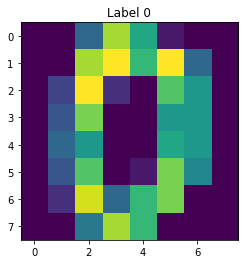

In [6]:
plt.figure()
plt.imshow(X[0].reshape(8,8))
plt.title("Label "+str(Y[0]))
plt.show()

In [7]:
X[0] #here the values are not continues

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Train Models

In [8]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [9]:
mnb=MultinomialNB()
gnb=GaussianNB()

In [10]:
# Training

mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
mnb.score(X,Y),gnb.score(X,Y)

(0.9053978853644964, 0.8580968280467446)

In [12]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8113904407200497

In [13]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8797858472998138

In [14]:
# This is because each value is a discrete value and multinomial performs better

In [15]:
'''Use this method directly'''

import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion Matrix",cmap=plt.cm.Blues):
    '''This Function plots the confusion matrix and normalization can be applied
       by setting normalize=True'''
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalised Confusion Matrix")
    else:
        print("Confusion matrix without normalisation")
        
    
    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()    
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color="white" if cm[i,j]>thresh else "black")
        
        
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

In [16]:
from sklearn.metrics import confusion_matrix

Y_mnb=mnb.predict(X)

cnf_matrix=confusion_matrix(Y,Y_mnb)
cnf_matrix

array([[175,   0,   0,   0,   3,   0,   0,   0,   0,   0],
       [  0, 137,  14,   0,   0,   1,   2,   0,  13,  15],
       [  0,   7, 160,   0,   0,   0,   0,   0,   8,   2],
       [  0,   0,   2, 159,   0,   2,   0,   5,   8,   7],
       [  1,   0,   0,   0, 173,   0,   0,   4,   3,   0],
       [  0,   0,   0,   0,   1, 157,   1,   1,   2,  20],
       [  0,   2,   0,   0,   1,   1, 176,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   1,   0],
       [  0,  11,   1,   0,   1,   0,   1,   1, 154,   5],
       [  0,   1,   0,   1,   1,   1,   0,  11,   7, 158]], dtype=int64)

Confusion matrix without normalisation
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


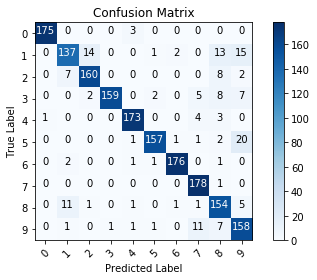

In [17]:
plot_confusion_matrix(cnf_matrix,classes=[0,1,2,3,4,5,6,7,8,9])

In [20]:
Y_gnb=gnb.predict(X)

cnf_matrix2=confusion_matrix(Y,Y_gnb)
cnf_matrix2

array([[176,   0,   0,   0,   1,   0,   0,   1,   0,   0],
       [  0, 154,   0,   0,   0,   0,   3,   5,  14,   6],
       [  0,  13, 113,   0,   0,   1,   1,   0,  49,   0],
       [  0,   2,   2, 145,   0,   6,   0,   7,  20,   1],
       [  1,   1,   0,   0, 152,   1,   2,  21,   3,   0],
       [  0,   0,   0,   3,   0, 169,   1,   6,   2,   1],
       [  0,   1,   0,   0,   0,   1, 179,   0,   0,   0],
       [  0,   0,   0,   0,   1,   1,   0, 177,   0,   0],
       [  0,   8,   0,   1,   0,   3,   0,  12, 150,   0],
       [  1,   6,   0,   5,   1,   3,   0,  17,  20, 127]], dtype=int64)

Confusion matrix without normalisation
[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


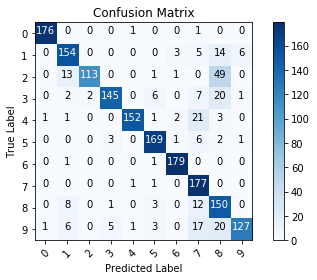

In [21]:
plot_confusion_matrix(cnf_matrix2,classes=[0,1,2,3,4,5,6,7,8,9])

In [ ]:
# here mnb performs better than gnb